In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# matplotlib styling
mpl.rc('text', usetex=True)
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
# plt.style.use('gruvbox')

In [2]:
PI = np.pi

In [3]:
def factorial(n):
    if n==0:
        return 1
    else:
        return n*factorial(n-1)

In [4]:
7%4%3

0

In [5]:
import itertools

In [6]:
def sine(xarr, O):
    yarr = np.zeros(shape=xarr.shape)
    for i, x in enumerate(xarr):
        y = 0
        for _ in range(O):
            if _ % 2:
                y += np.power(-1, 1+(_%4)%3)*np.power(x, _)/(factorial(_))
        yarr[i] = y
    return yarr

def cosine(xarr, O):
    yarr = np.zeros(shape=xarr.shape)
    for i, x in enumerate(xarr):
        y = 0
        for _ in range(O):
            if not (_ % 2):
                y += np.power(-1, ((_//2)%2))*np.power(x, _)/(factorial(_))
        yarr[i] = y
    return yarr

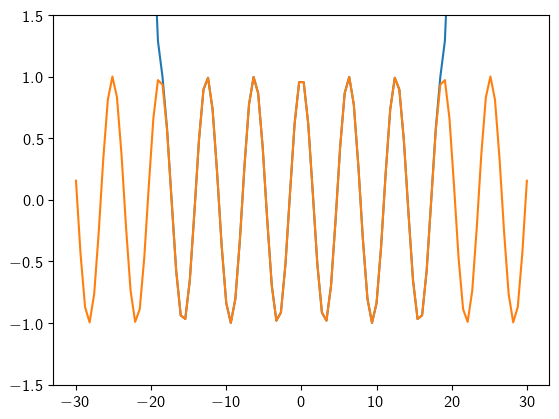

In [7]:
x = np.linspace(-30, 30, 100)
plt.plot(x, cosine(x, 50))
plt.plot(x, np.cos(x))
plt.ylim(-1.5, 1.5)
plt.show()

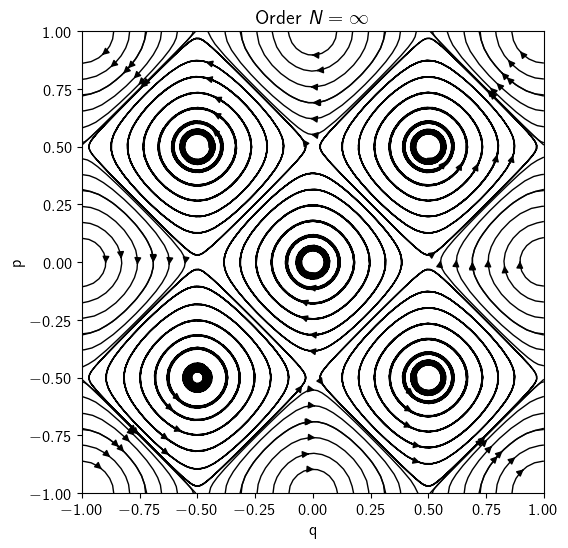

In [12]:
# Y, X = np.mgrid[0:1:100j, 0:1:100j]
Y, X = np.mgrid[-1:1:100j, -1:1:100j]
U = +2*PI*np.sin(2*PI*Y)
V = -2*PI*np.sin(2*PI*X)

# speed = np.sqrt(U**2 + V**2)
fig, ax = plt.subplots(1, figsize=(6,6))
ax.set_aspect(1)

ax.streamplot(X, Y, U, V, density = 1, broken_streamlines=False, linewidth=1, color='black', zorder=-9999)

# ax.scatter(*(np.array([
#     [0, 0],
#     [0, 1],
#     [1, 0],
#     [1, 1],
#     [0.5, 0.5]
# ]).T), s=(100,)*5, color='blue', linewidth=0, alpha=1)

# ax.scatter(*(np.array([
#     [0.5, 0],
#     [0, 0.5],
#     [1, 0.5],
#     [0.5, 1]
# ]).T), s=(100,)*4, color='red', linewidth=0, alpha=1)

plt.xlabel('q')
plt.ylabel('p')

plt.title(r'Order $N=\infty$')
plt.show()

In [10]:
def harperH(q, p):
    return 2 - np.cos(2*PI*q) - np.cos(2*PI*p)

def harperJ(q, p):
    J = np.array([
            [0, -4*(PI**2)*np.cos(2*PI*p)],
            [-4*(PI**2)*np.cos(2*PI*q), 0]
    ])
    dJ = det(J)
    if dJ == 0:
        return 'saddle'
    elif dJ > 0:
        return 'unstable'
    else:
        return 'stable'

In [5]:
from numpy.linalg import det

In [13]:
harperJ(0.5, 0.5)

'stable'

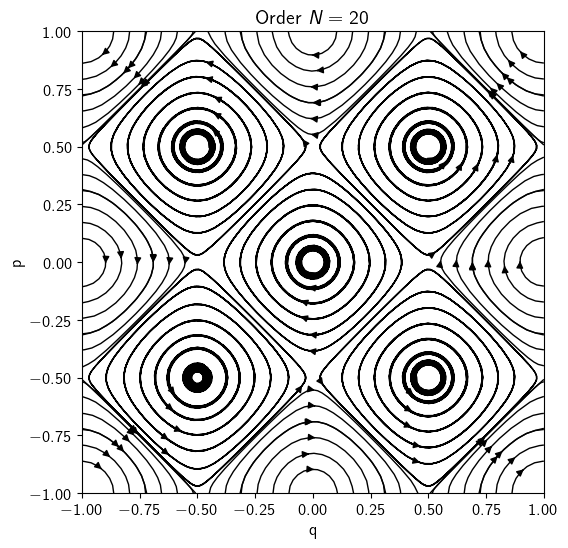

In [200]:
# Y, X = np.mgrid[0:1:100j, 0:1:100j]
# Y, X = np.mgrid[-0.1:1.1:100j, -0.1:1.1:100j]
Y, X = np.mgrid[-1:1:100j, -1:1:100j]

ORD = 20
U = +2*PI*sine(2*PI*Y, ORD)
V = -2*PI*sine(2*PI*X, ORD)
fig, ax = plt.subplots(1, figsize=(6,6))
ax.set_aspect(1)
ax.streamplot(X, Y, U, V, density = 1, broken_streamlines=False, linewidth=1, color='black', zorder=-9999)
plt.title(rf'Order $N={ORD}$')
plt.xlabel('q')
plt.ylabel('p')
plt.show()

In [202]:
np.arange(2, 21, 2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [204]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs) -> 'None'
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, transparent=None, dpi='figure', format=None,
          metadata=None, bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto', backend=None,
          **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has

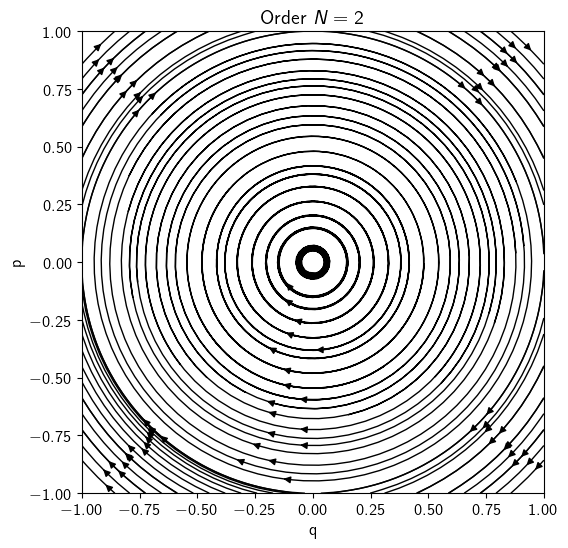

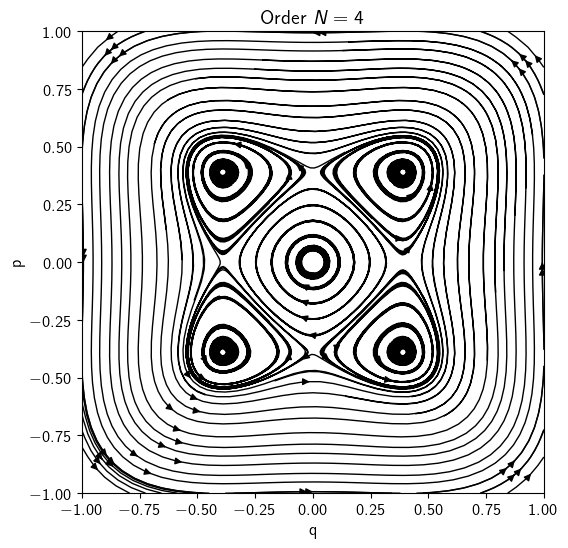

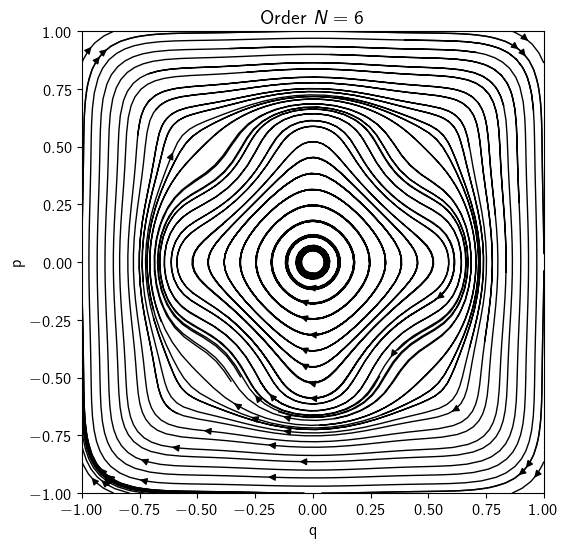

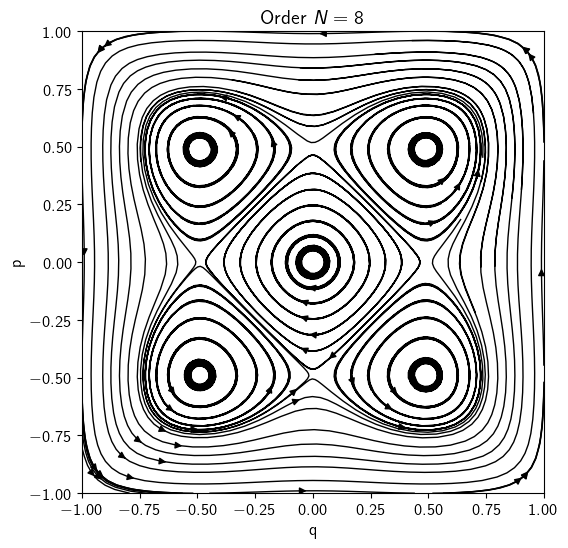

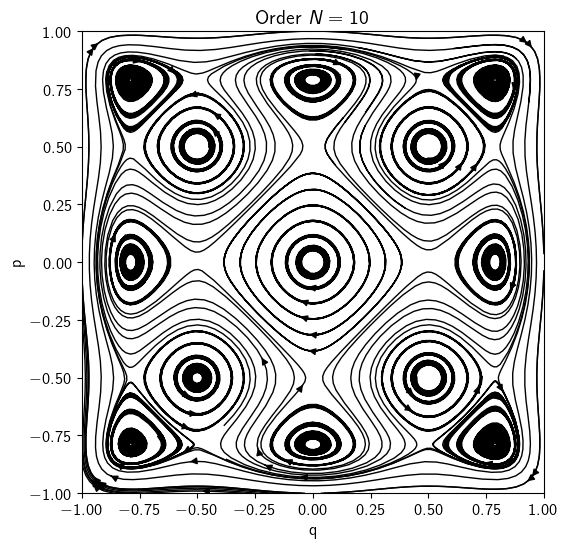

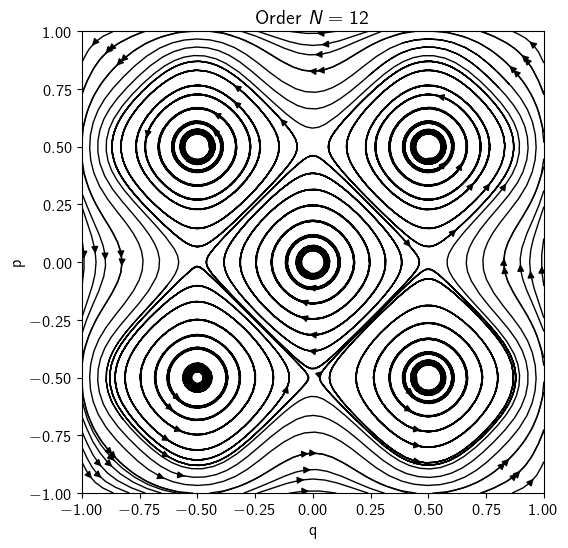

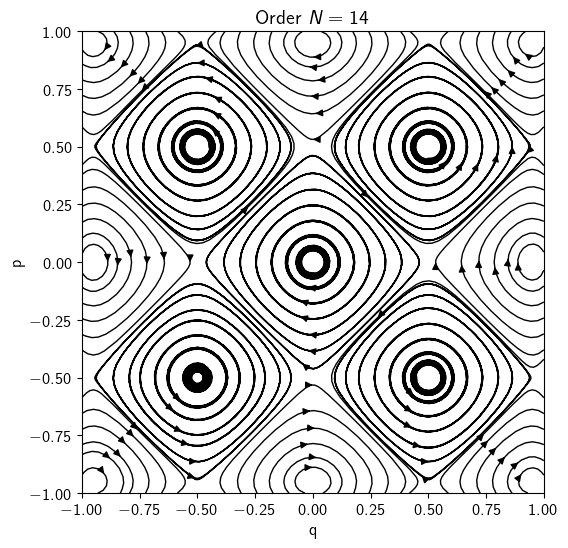

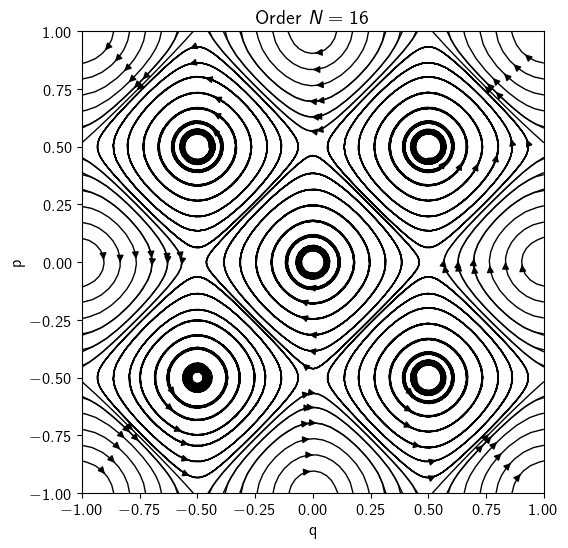

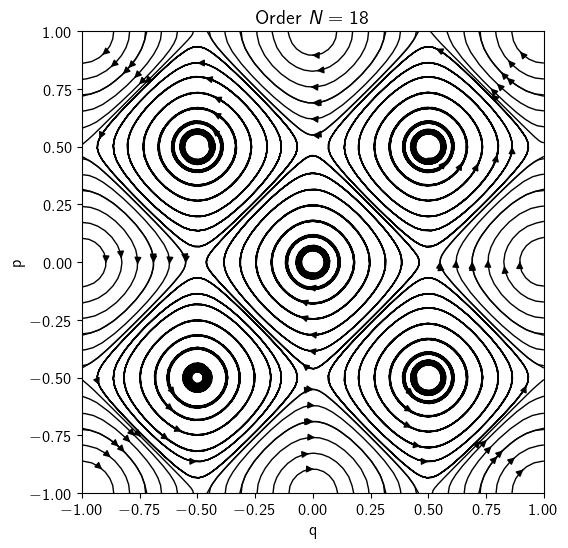

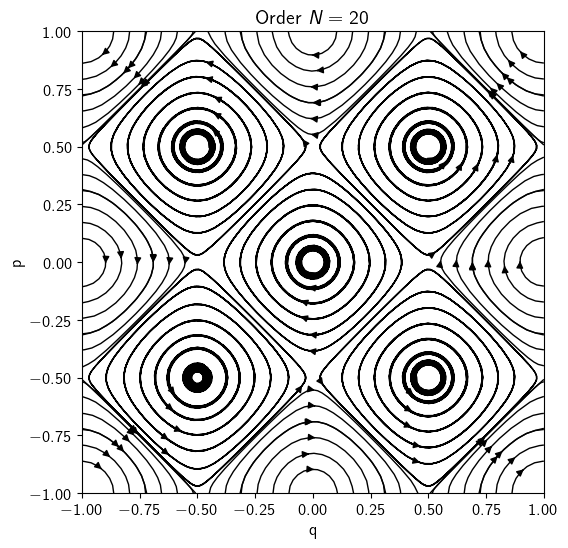

In [208]:
# Y, X = np.mgrid[0:1:100j, 0:1:100j]
# Y, X = np.mgrid[-0.1:1.1:100j, -0.1:1.1:100j]
Y, X = np.mgrid[-1:1:100j, -1:1:100j]
for ords in np.arange(2, 21, 2):
    ORD = ords
    U = +2*PI*sine(2*PI*Y, ORD)
    V = -2*PI*sine(2*PI*X, ORD)
    fig, ax = plt.subplots(1, figsize=(6,6))
    ax.set_aspect(1)
    ax.streamplot(X, Y, U, V, density = 1, broken_streamlines=False, linewidth=1, color='black', zorder=-9999)
    plt.title(rf'Order $N={ORD}$')
    plt.xlabel('q')
    plt.ylabel('p')
    plt.savefig(rf'../plots/harper-deform-{str(ORD).zfill(2)}.png')
# plt.show()